# Importing dataframe and libraries

In [293]:
# Importing libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

# Importing dataset

In [294]:
# Establishing project path

path = r'/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/092025_global_startup_ecosystem_analysis'

In [295]:
path

'/Users/MadrigalPaez/Documents/2 - FORMACIÓN Y TRABAJO/CAREER FOUNDRY/DATA ANALYTICS/2 - Data Immersion/Achievement 6 - Advanced Analytics & Dashboard Design/092025_global_startup_ecosystem_analysis'

In [296]:
# Importing "global_startup_cleaned.pkl" dataframe

global_startup_cleaned = pd.read_pickle(os.path.join(path, '02_data', 'prepared_data', 'global_startup_cleaned.pkl'))

In [297]:
# Removing categorical columns

categorical_columns = ['founded_year', 'startup_name', 'country', 'industry', 'funding_stage', 
                    'acquired', 'ipo', 'tech_stack']
startup_numerical_values = global_startup_cleaned.drop(columns=categorical_columns)

In [298]:
startup_numerical_values.head()

,total_funding_millions,number_employees,annual_revenue_millions,valuation_billions,success_score,customers_millions,social_media_followers
0,269.0,3047.0,104.0,46.11,5.0,43.0,4158814.0
1,40.0,630.0,431.0,33.04,1.0,64.0,4063014.0
2,399.0,2475.0,375.0,15.79,8.0,74.0,3449855.0
3,404.0,1011.0,907.0,17.12,7.0,26.0,630421.0
4,419.0,3917.0,280.0,4.39,6.0,30.0,365956.0


# Preparing/Processing data for analysis

In [299]:
# Standardizing the data

scaler = StandardScaler()
startup_data_scaled = scaler.fit_transform(startup_numerical_values)

In [300]:
startup_data_scaled

array([[ 1.22232932e-01,  3.87477959e-01, -1.35056628e+00, ...,
         1.35972068e-02, -2.22226472e-01,  1.11702965e+00],
       [-1.46903407e+00, -1.27771689e+00, -2.23145240e-01, ...,
        -1.54036928e+00,  5.18199356e-01,  1.05006774e+00],
       [ 1.02557228e+00, -6.60208078e-03, -4.16220403e-01, ...,
         1.17907207e+00,  8.70783084e-01,  6.21484312e-01],
       ...,
       [ 5.87800133e-01,  2.87430407e-04, -7.95475186e-01, ...,
        -1.54036928e+00, -9.27393927e-01, -9.75394189e-01],
       [-1.51072666e+00, -5.17114859e-01, -1.58846246e+00, ...,
         4.02088829e-01,  9.06041457e-01,  1.25286515e+00],
       [ 1.98669338e-01,  3.03425922e-01,  3.19897962e-02, ...,
         1.17907207e+00,  1.32914193e+00, -1.14836908e+00]])

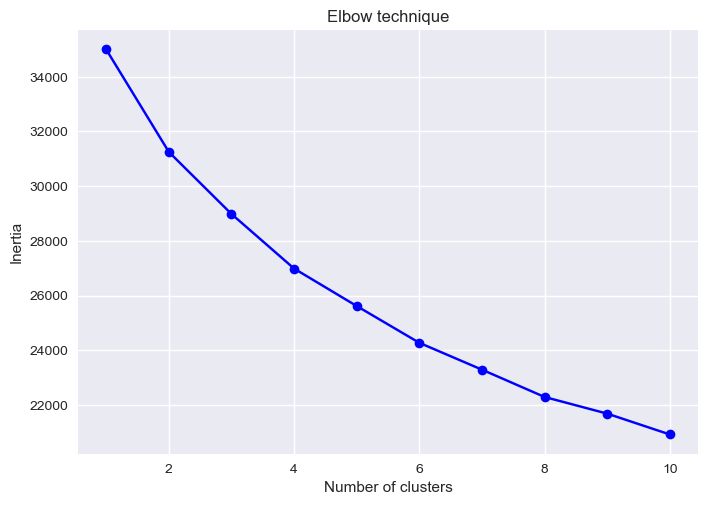

In [301]:
# Using Elbow Technique to determine the optimal number of clusters

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(startup_data_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow technique')
plt.show()

The elbow method indicates that 5 clusters represent the optimal segmentation for the dataset. The inertia shows a decline from cluster 1 to cluster 4, with the curve beginning to flatten around the cluste 5. This suggests diminishing returns in variance explanation beyond this point.

In [302]:
# Run k-means with Chosen k

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(startup_data_scaled)

In [303]:
KMeans(n_clusters=5)

KMeans(n_clusters=5)

In [304]:
# Add clusters column to original dataframe

global_startup_cleaned['cluster'] = clusters

In [305]:
global_startup_cleaned.head()

,startup_name,founded_year,country,industry,funding_stage,total_funding_millions,number_employees,annual_revenue_millions,valuation_billions,success_score,acquired,ipo,customers_millions,tech_stack,social_media_followers,cluster
0,Startup_1,2009-01-01,Canada,Healthcare,Series A,269.0,3047.0,104.0,46.11,5.0,No,No,43.0,"Java, Spring",4158814.0,2
1,Startup_2,2004-01-01,UK,Healthcare,IPO,40.0,630.0,431.0,33.04,1.0,No,Yes,64.0,"Node.js, React",4063014.0,0
2,Startup_3,2018-01-01,USA,Healthcare,Seed,399.0,2475.0,375.0,15.79,8.0,No,No,74.0,"PHP, Laravel",3449855.0,3
3,Startup_4,2014-01-01,France,Tech,Seed,404.0,1011.0,907.0,17.12,7.0,Yes,Yes,26.0,"Python, AI",630421.0,4
4,Startup_5,2006-01-01,Japan,Energy,Series C,419.0,3917.0,280.0,4.39,6.0,Yes,Yes,30.0,"Node.js, React",365956.0,4


In [306]:
cluster_summary = global_startup_cleaned.groupby('cluster')[['total_funding_millions', 'number_employees',
                                         'annual_revenue_millions', 'valuation_billions',
                                         'success_score', 'customers_millions',
                                         'social_media_followers']].mean()

In [307]:
cluster_summary

,total_funding_millions,number_employees,annual_revenue_millions,valuation_billions,success_score,customers_millions,social_media_followers
cluster,,,,,,,
0,218.575610,1254.666341,455.129756,38.942195,5.271220,53.380488,2.040550e+06
1,260.026062,3550.664093,767.000000,29.686641,4.972973,47.815637,3.326925e+06
2,231.037871,3761.210850,205.719550,27.899069,4.600819,47.700102,2.711969e+06
3,277.110537,1327.894628,419.291322,15.080713,5.553719,44.652893,3.674200e+06
4,271.280684,2513.368209,614.311871,13.742243,4.425553,52.751509,1.065514e+06


# Visualizations w/ the clusters

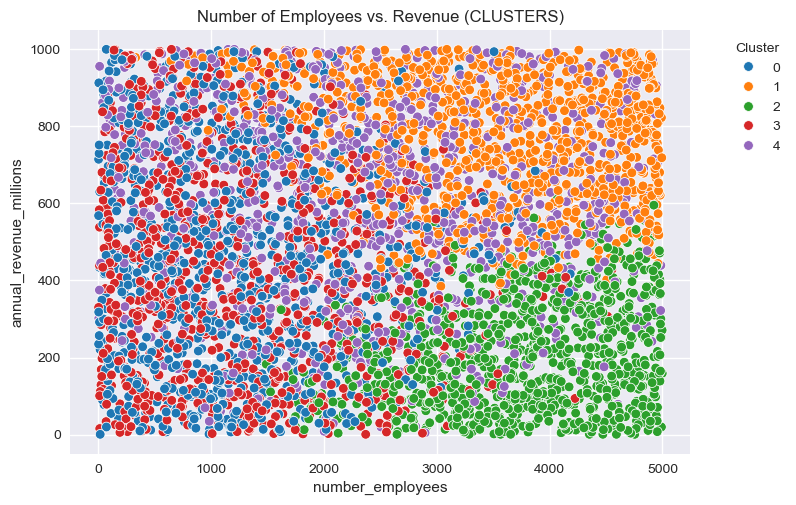

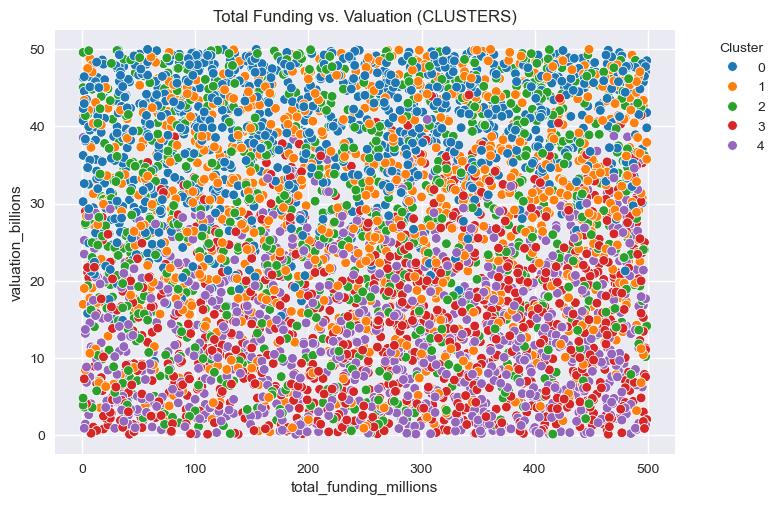

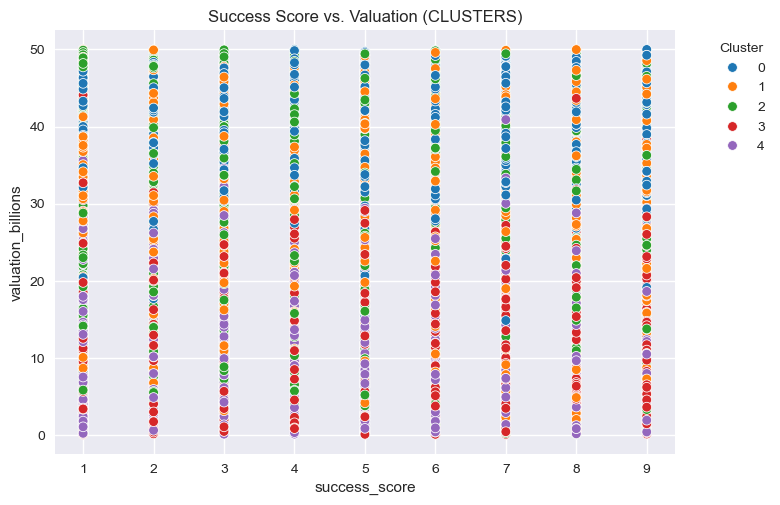

In [308]:
# Defining colours for the diff. clusters

cluster_colors = {
    0: "#1f77b4",  # azul
    1: "#ff7f0e",  # naranja
    2: "#2ca02c",  # verde
    3: "#d62728",  # rojo
    4: "#9467bd"   # morado
}

# Creating scatterplot showing Number of employees vs. Annual Revenue

sns.scatterplot(
    x='number_employees',
    y='annual_revenue_millions',
    hue='cluster',
    data=global_startup_cleaned,
    palette=cluster_colors
)
plt.title("Number of Employees vs. Revenue (CLUSTERS)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Creating scatterplot showing Total funding vs. Valuation

sns.scatterplot(
    x='total_funding_millions',
    y='valuation_billions',
    hue='cluster',
    data=global_startup_cleaned,
    palette=cluster_colors
)
plt.title("Total Funding vs. Valuation (CLUSTERS)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Creating scatterplot showing Success Score vs. Valuation

sns.scatterplot(
    x='success_score',
    y='valuation_billions',
    hue='cluster',
    data=global_startup_cleaned,
    palette=cluster_colors
)
plt.title("Success Score vs. Valuation (CLUSTERS)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Exploring Clusters data

In [309]:
global_startup_cleaned.groupby('cluster')[['total_funding_millions', 'number_employees', 
                                            'annual_revenue_millions', 'valuation_billions', 
                                            'success_score', 'customers_millions', 
                                            'social_media_followers']].mean()

,total_funding_millions,number_employees,annual_revenue_millions,valuation_billions,success_score,customers_millions,social_media_followers
cluster,,,,,,,
0,218.575610,1254.666341,455.129756,38.942195,5.271220,53.380488,2.040550e+06
1,260.026062,3550.664093,767.000000,29.686641,4.972973,47.815637,3.326925e+06
2,231.037871,3761.210850,205.719550,27.899069,4.600819,47.700102,2.711969e+06
3,277.110537,1327.894628,419.291322,15.080713,5.553719,44.652893,3.674200e+06
4,271.280684,2513.368209,614.311871,13.742243,4.425553,52.751509,1.065514e+06


In [310]:
global_startup_cleaned.groupby('cluster')[['number_employees', 'annual_revenue_millions']].mean()

,number_employees,annual_revenue_millions
cluster,,
0,1254.666341,455.129756
1,3550.664093,767.000000
2,3761.210850,205.719550
3,1327.894628,419.291322
4,2513.368209,614.311871


In [311]:
global_startup_cleaned.groupby('cluster')[['total_funding_millions', 'valuation_billions']].mean()

,total_funding_millions,valuation_billions
cluster,,
0,218.575610,38.942195
1,260.026062,29.686641
2,231.037871,27.899069
3,277.110537,15.080713
4,271.280684,13.742243


In [312]:
global_startup_cleaned.groupby('cluster')[['success_score', 'valuation_billions']].mean()

,success_score,valuation_billions
cluster,,
0,5.271220,38.942195
1,4.972973,29.686641
2,4.600819,27.899069
3,5.553719,15.080713
4,4.425553,13.742243


All in all, I'm not fully convinced of the clusters' result. The cluster scatter plot reveals some potential startup archetypes based mainly on annual revenue and customer base, but also some other combinations:

- Cluster 0: Startups with very high valuation and moderate revenue. They have a strong customer base (>53M) and a success score >5.27. Relatively small in terms of number of employees.

- Cluster 1: Largest workforce (>3,500) and the highest revenue cluster. Valuation relatively lower for revenue (>$29B). Moderate success score (<5), and strong social media presence.

- Cluster 2: Large in terms of employees, and low revenue. As for Cluster 1, moderate success score (4.60).

- Cluster 3: Small team of employees (1,328) with solid revenue. Low  valuation (15B) relative to revenue. The highest success score (5.55). Strong social media following.

- Cluster 4: Large Customer Base, but Low Valuation. As for the 1 and 2 clusters, low success score (4.43).

As the next step, we can try to probe and analyze the startup clusters through more visualizations and techniques:

- Radar chart normalized, which will give me a better visualization of the profile of each cluster.
- Heatmap of cluster centroids, showing the normalized values of each variable per cluster. It will make it easier to compare those clusters/profiles characteristics side-by-side.
- In addition, I will use PCA plots to reduce dimensionality to see if I can reveal an underlying structure more clearly.

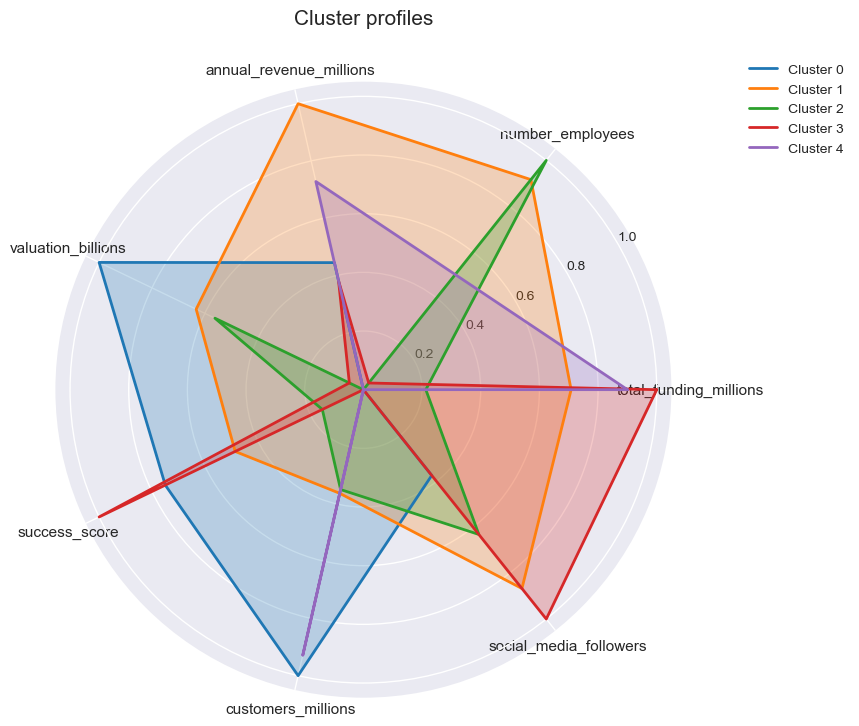

In [313]:
# Normalizing cluster to 1-0 scale and creating the radar chart

cluster_normalized = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

cluster_normalized = cluster_normalized.apply(pd.to_numeric, errors='coerce')

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

angles += angles[:1]
fig, ax = plt.subplots(figsize=(10,8), subplot_kw=dict(polar=True))

cluster_colors = {
    0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c", 3: "#d62728", 4: "#9467bd"
}

for i in cluster_normalized.index:
    values = cluster_normalized.loc[i].values.flatten().tolist()
    values += values[:1]
    color = cluster_colors.get(i, '#333333')
    ax.plot(angles, values, color=color, linewidth=2, label=f'Cluster {i}')
    ax.fill(angles, values, color=color, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11)
ax.set_rlabel_position(30)

ax.set_title("Cluster profiles", y=1.08, fontsize=15)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05))
plt.show()

# Running Principal Component Analysis

In [314]:
global_startup_excluding_clusters = global_startup_cleaned[['total_funding_millions', 'number_employees',
                            'annual_revenue_millions', 'valuation_billions',
                            'success_score', 'customers_millions',
                            'social_media_followers']]

pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(global_startup_excluding_clusters)

global_startup_cleaned['pca1'] = components[:,0]
global_startup_cleaned['pca2'] = components[:,1]

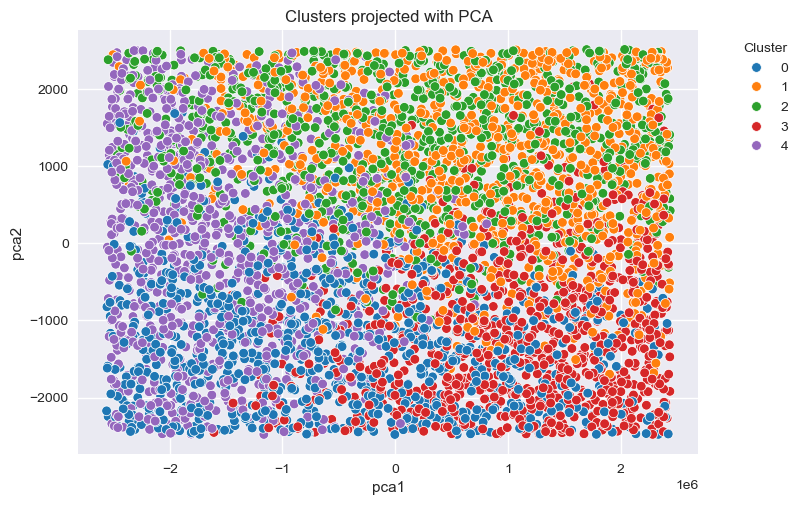

In [315]:
# Visualizing PCA

sns.scatterplot(
    x='pca1',
    y='pca2',
    hue='cluster',
    data=global_startup_cleaned,
    palette=cluster_colors
)
plt.title("Clusters projected with PCA")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

By reducing multidimensional features to two principal components, we can observe that clusters aren't perfectly separated, indicating that some company profiles share characteristics across clusters.

- Cluster 0: Mostly concentrated in the lower-left quadrant, slightly spread towards the center. 

- Cluster 1: Spread across the top-right quadrant. 

- Cluster 2: Concentrated toward the center and top-right. It shows a bit of overlap with Cluster 1.

- Cluster 3: Mainly in the bottom-right quadrant, overlapping with Cluster 0. 

- Cluster 4: Spread along the left side of the plot, top and bottom. It overlaps with Clusters 0 and 2.


The PCA visualization confirms the previous numerical cluster analysis:

- Clusters 0 and 3 are smaller startups with high success. 

- Clusters 1 and 2 are larger startups.

- Cluster 4 have more customers.

In [316]:
# Normalizing data by column (variables between 0 and 1)

cluster_summary_norm = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

In [317]:
cluster_summary_norm

,total_funding_millions,number_employees,annual_revenue_millions,valuation_billions,success_score,customers_millions,social_media_followers
cluster,,,,,,,
0,0.000000,0.000000,0.444359,1.000000,0.749594,1.000000,0.373765
1,0.708132,0.916001,1.000000,0.632715,0.485230,0.362384,0.866878
2,0.212903,1.000000,0.000000,0.561780,0.155354,0.349147,0.631144
3,1.000000,0.029215,0.380508,0.053114,1.000000,0.000000,1.000000
4,0.900404,0.502166,0.727965,0.000000,0.000000,0.927932,0.000000


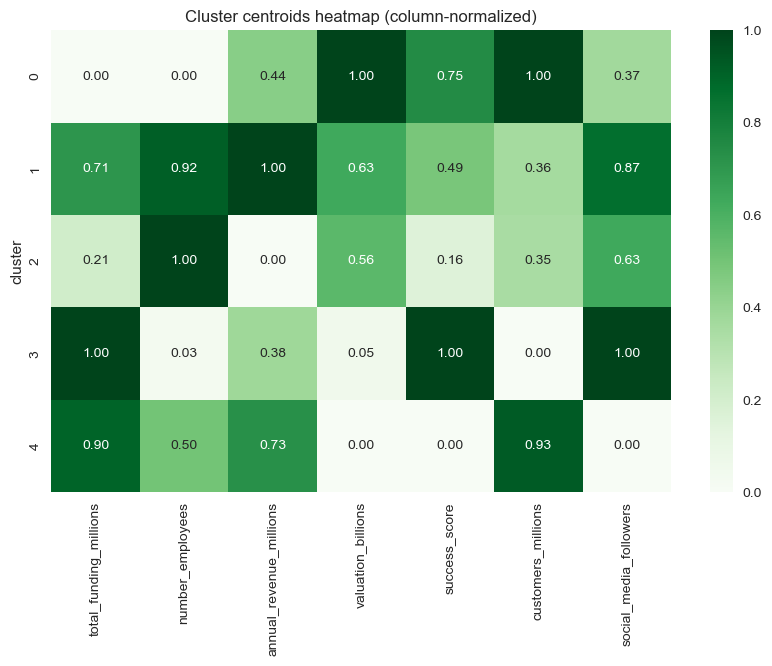

In [318]:
# Creating heatmap w/ normalized data

plt.figure(figsize=(10,6))
sns.heatmap(
    cluster_summary_norm,
    annot=True,
    cmap="Greens",
    fmt=".2f"
)
plt.title("Cluster centroids heatmap (column-normalized)")
plt.show()

The heatmap analysis shows some key differences with the PCA analysis, and adds more information. Together, these analyses provide more clarity for establishing next steps and further exploration of the clusters individually. I would need to explore some connections that caught my attention:

- Cluster 0: 1.00 valuation, 1.00 customers

- Cluster 1: 1.00 revenue, 0.92 employees.

- Cluster 2: 1.00 employees, 0.00 revenue.

- Cluster 3: 1.00 success_score, 1.00 social_media, 0.03 employees.

- Cluster 4: 0.93 customers, 0.00 valuation.

Furthermore, I could analyse clusters on industry or country level too.

# Exporting final dataframe w/clusters and PCA

In [319]:
global_startup_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   startup_name             5000 non-null   object        
 1   founded_year             5000 non-null   datetime64[ns]
 2   country                  5000 non-null   category      
 3   industry                 5000 non-null   category      
 4   funding_stage            5000 non-null   category      
 5   total_funding_millions   5000 non-null   float64       
 6   number_employees         5000 non-null   float64       
 7   annual_revenue_millions  5000 non-null   float64       
 8   valuation_billions       5000 non-null   float64       
 9   success_score            5000 non-null   float64       
 10  acquired                 5000 non-null   category      
 11  ipo                      5000 non-null   category      
 12  customers_millions       5000 non-

In [320]:
global_startup_cleaned.head()

,startup_name,founded_year,country,industry,funding_stage,total_funding_millions,number_employees,annual_revenue_millions,valuation_billions,success_score,acquired,ipo,customers_millions,tech_stack,social_media_followers,cluster,pca1,pca2
0,Startup_1,2009-01-01,Canada,Healthcare,Series A,269.0,3047.0,104.0,46.11,5.0,No,No,43.0,"Java, Spring",4158814.0,2,1.598094e+06,562.721912
1,Startup_2,2004-01-01,UK,Healthcare,IPO,40.0,630.0,431.0,33.04,1.0,No,Yes,64.0,"Node.js, React",4063014.0,0,1.502294e+06,-1853.676305
2,Startup_3,2018-01-01,USA,Healthcare,Seed,399.0,2475.0,375.0,15.79,8.0,No,No,74.0,"PHP, Laravel",3449855.0,3,8.891354e+05,-9.169699
3,Startup_4,2014-01-01,France,Tech,Seed,404.0,1011.0,907.0,17.12,7.0,Yes,Yes,26.0,"Python, AI",630421.0,4,-1.930299e+06,-1474.042205
4,Startup_5,2006-01-01,Japan,Energy,Series C,419.0,3917.0,280.0,4.39,6.0,Yes,Yes,30.0,"Node.js, React",365956.0,4,-2.194764e+06,1430.380183


In [321]:
# Exporting "global_startup_cleaned" dataframe

global_startup_cleaned.to_pickle(os.path.join(path, '02_data','prepared_data', 'global_startup_cleaned_with_clusters_and_pca.pkl'))